In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
dataframe = pd.read_csv(r"avocado.csv")
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
dataframe.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
print(dataframe.groupby('year').size())

year
2015    5615
2016    5616
2017    5722
2018    1296
dtype: int64


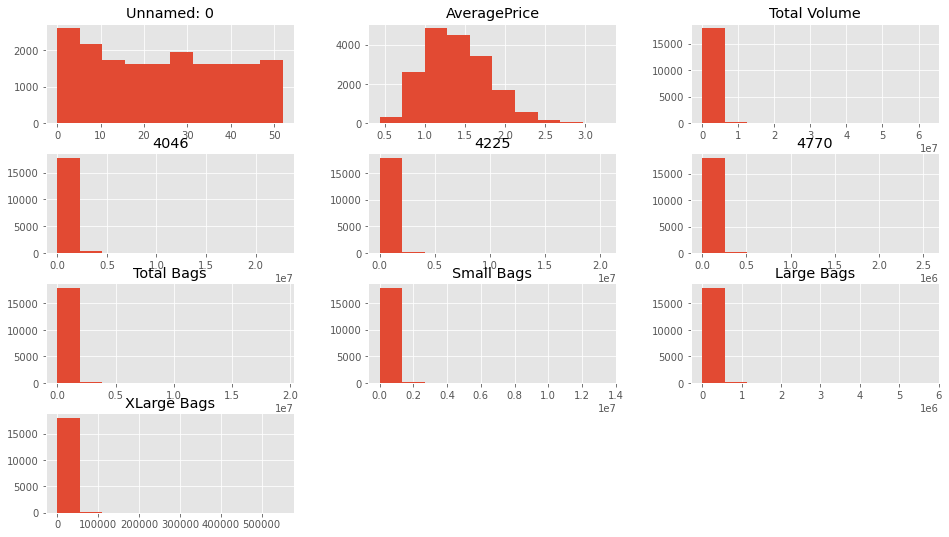

In [7]:
#Veremos graficamente nuestros datos para tener una idea de la dispersión de los mismos:
dataframe.drop(['year'],1).hist()
plt.show()

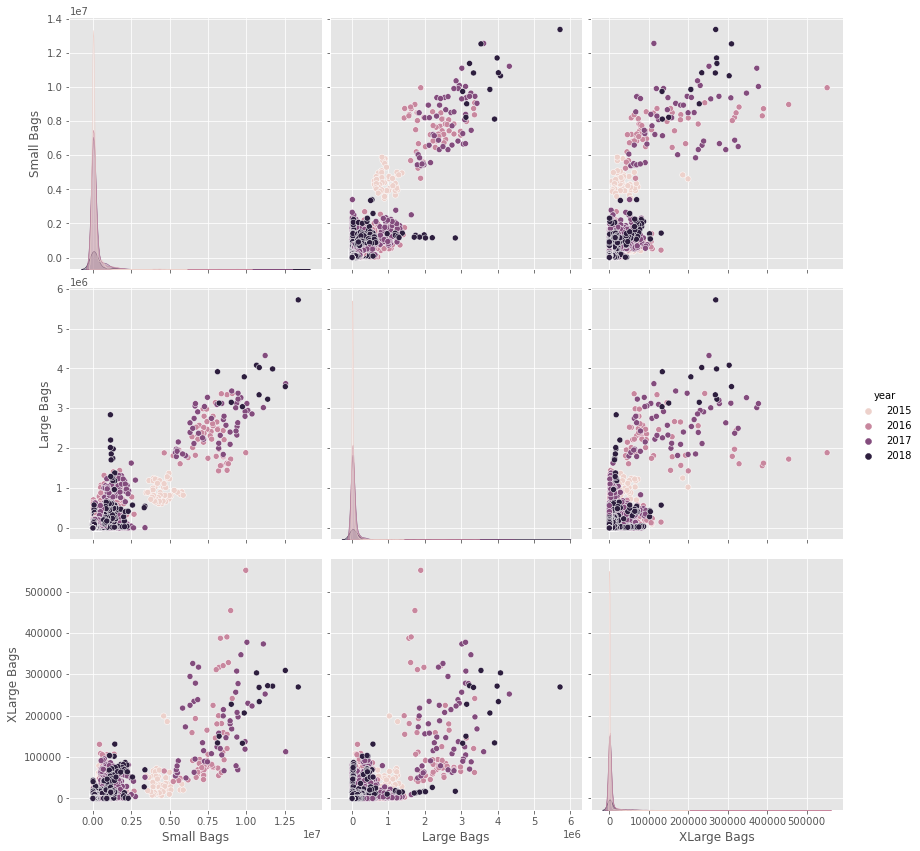

In [10]:
#En este caso seleccionamos 3 dimensiones: op, ex y ag y las cruzamos para ver si 
#nos dan alguna pista de su agrupación y la relación con sus categorías.

sb.pairplot(dataframe.dropna(), hue='year',height=4,vars=["Small Bags","Large Bags","XLarge Bags"],kind='scatter')

In [42]:
#Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, 
#sólo cargamos las columnas op, ex y ag en nuestra variable X.
X = np.array(dataframe[["Small Bags","Large Bags","XLarge Bags"]])
y = np.array(dataframe['year'])
X.shape

(18249, 3)

In [40]:
X[:,0]

array([ 8603.62,  9408.07,  8042.21, ...,  9351.8 , 10919.54, 11988.14])

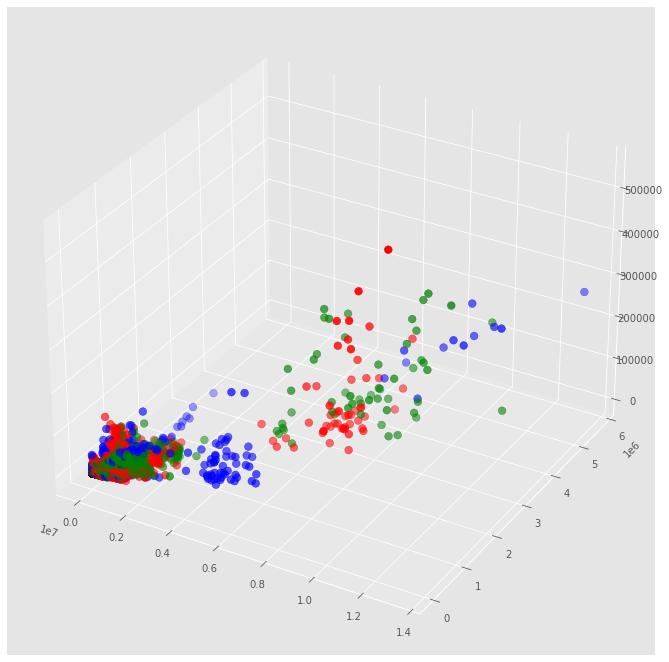

In [43]:
#Ahora veremos una gráfica en 3D con 9 colores representando las categorías.

fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','yellow']
asignar=[]
#y = dataframe['year'].unique()
for row in y:
    asignar.append(colores[row-2015])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

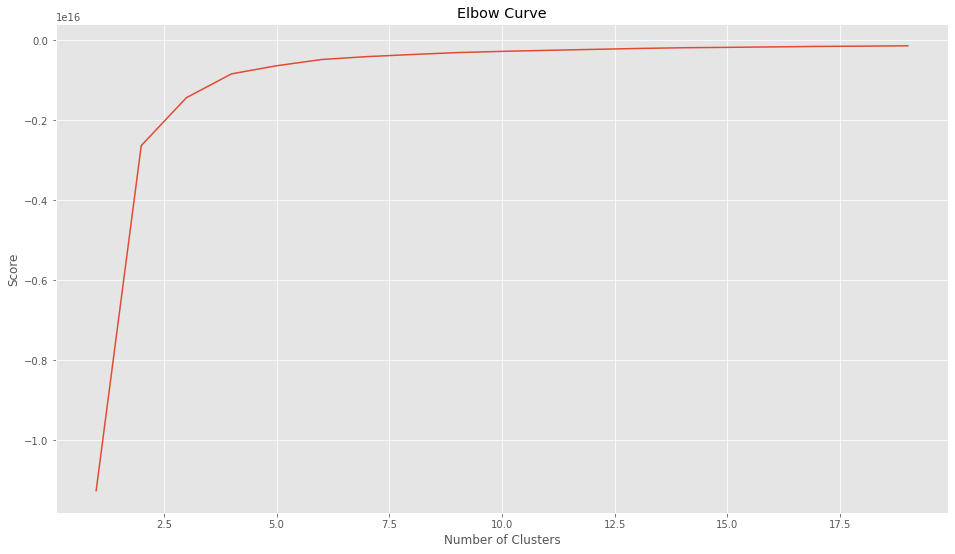

In [19]:
'''
Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que 
comentábamos antes. Este es nuestro resultado:
'''
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [62]:
'''
Ejecutamos K-Means
Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.
'''
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[4.44433836e+04 1.63536631e+04 5.98751261e+02]
 [8.59132996e+06 2.70660502e+06 1.76203967e+05]
 [6.60844597e+05 1.62926877e+05 1.23491712e+04]
 [1.52429230e+06 4.47318208e+05 2.60614873e+04]
 [4.79765477e+06 1.16313010e+06 6.01041015e+04]]


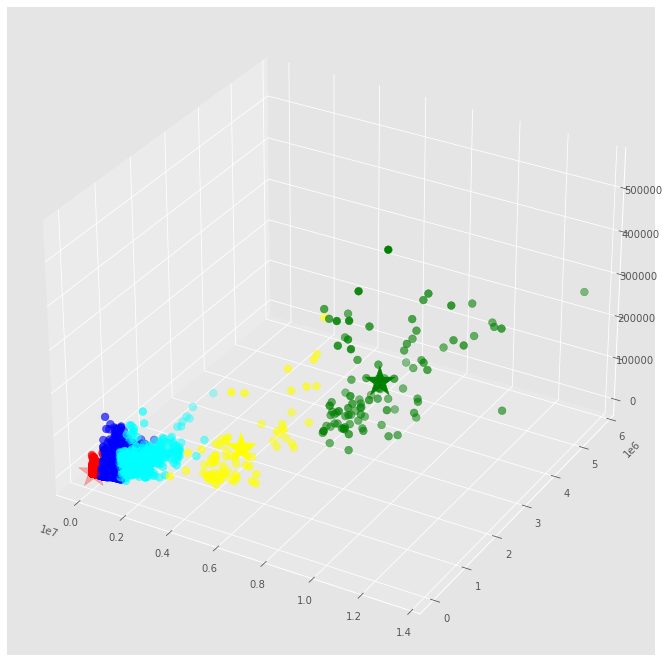

In [63]:
'''
Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se 
diferencian: (las estrellas marcan el centro de cada cluster)
'''
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

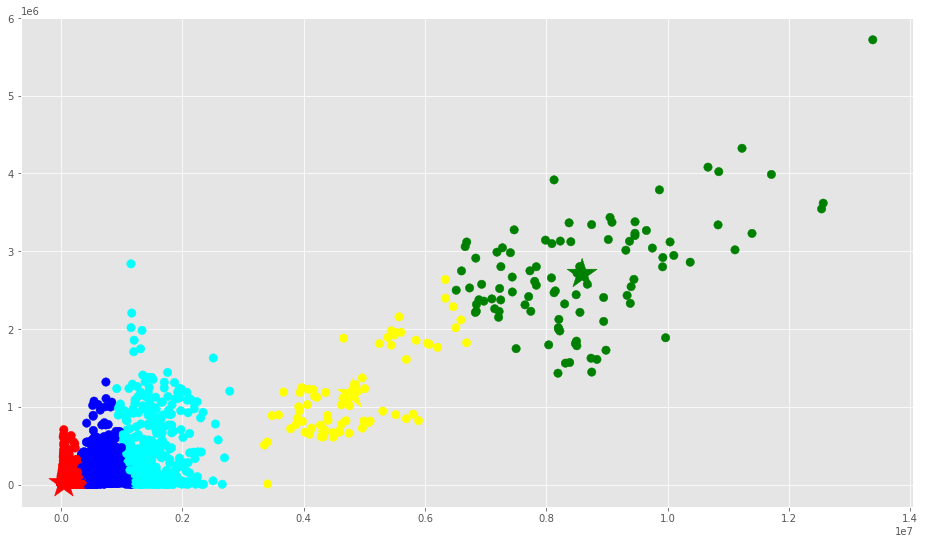

In [64]:
'''
Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 
3D para que nos ayude a visualizar los grupos y su clasificación:
'''
# Getting the values and plotting it
f1 = dataframe['Small Bags'].values
f2 = dataframe['Large Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

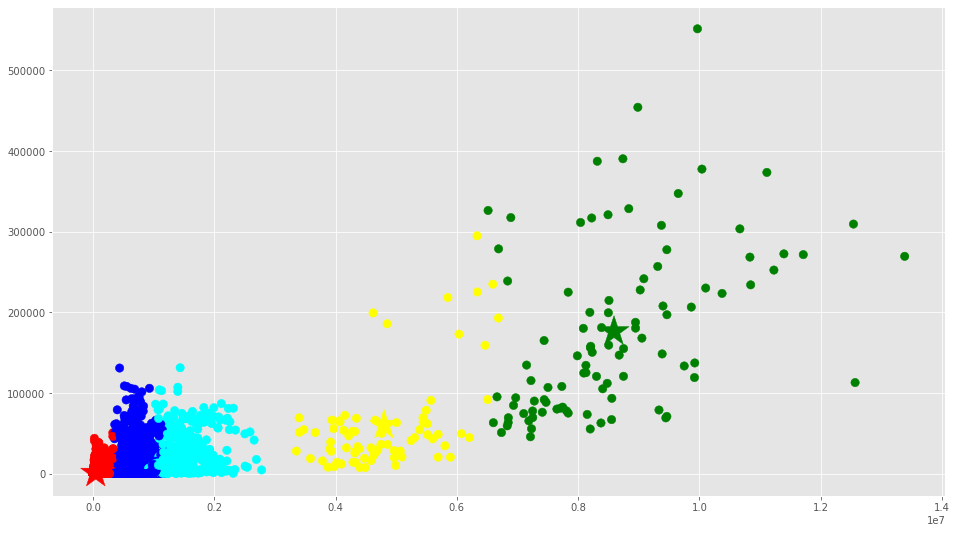

In [65]:
# Getting the values and plotting it
f1 = dataframe['Small Bags'].values
f2 = dataframe['XLarge Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

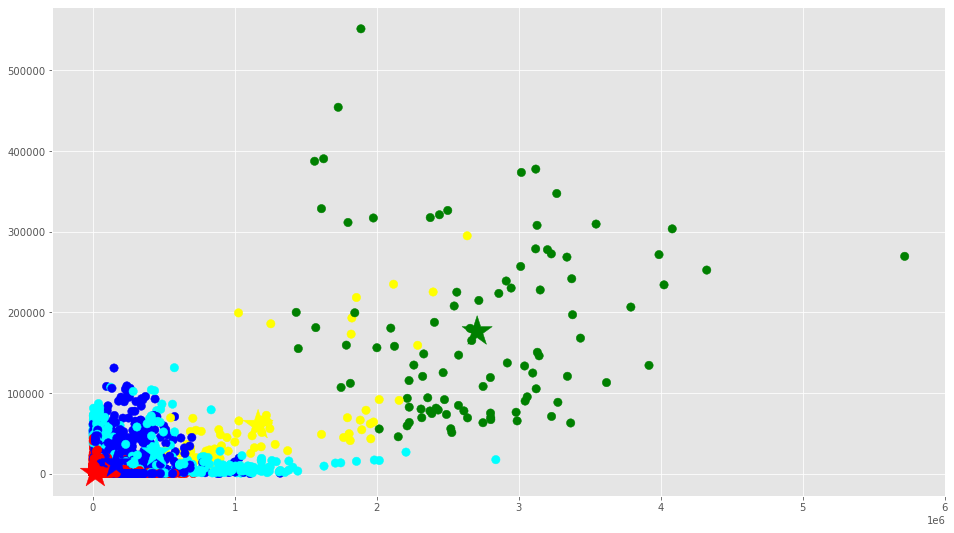

In [66]:
f1 = dataframe['Large Bags'].values
f2 = dataframe['XLarge Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [67]:
#Podemos ver cada uno de los clusters cuantos usuarios tiene:
copy =  pd.DataFrame()
copy['Date']=dataframe['Date'].values
copy['year']=dataframe['year'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,16449
1,green,97
2,blue,1242
3,cyan,386
4,yellow,75


In [68]:
'''
Y podemos ver la diversidad en rubros laborales de cada uno. Por ejemplo en el grupo 0 (rojo), 
vemos que hay de todas las actividades laborales aunque predominan de actividad 1 y 2 correspondiente 
a Actores y Cantantes con 11 y 15 famosos.
'''
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['year']=[2015,2016,2017,2018]
diversidadGrupo['cantidad']=group_referrals.groupby('year').size()
diversidadGrupo

,year,cantidad
0,2015,NaN
1,2016,NaN
2,2017,NaN
3,2018,NaN


In [69]:
'''
Buscaremos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir 
que tienen los rasgos de personalidad característicos que representan a cada cluster:
'''
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([8153, 8351, 5193, 8030, 2658], dtype=int64)

In [70]:
users=dataframe['Date'].values
for row in closest:
    print(users[row])

2017-02-12
2017-05-21
2016-02-14
2017-06-11
2015-11-15


In [71]:
'''
Y finalmente podemos agrupar y etiquetar nuevos usuarios twitter con sus características y 
clasificarlos. Vemos el ejemplo con el usuario de David Guetta y nos devuelve que pertenece al grupo 1 (verde).
'''
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]
